<a href="https://colab.research.google.com/github/jyothi-sk/data_science_adventure/blob/main/Airbnb_analysis_EDA_Capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - AirBnb Bookings Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

  Airbnb is a company operating an online marketplace for short-term homestays and experiences. Users can find homes or rooms to rent for a day or week. 

  Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb has become a one-of-a-kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


On observing the dataset we can explore the following:
*  Explore relationships between the locations and neighborhoods
*  Hosts Having maximum  and minimum listings on AIRBNB and which neighbourhoods do they belong.

*   Most and least booked room types with respect to location, price, availability, minimum nights


#### **Define Your Business Objective?**

Answer Here

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
import plotly.express as px

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Almabetter/Modules/Module1-Python_for_data_science/CAPSTONE_PROJECT-EDA_AIRBNB_BOOKINGS_ANALYSIS/Airbnb_NYC_2019.csv'
abdf = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [ ]:
# Dataset First Look
abdf.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
abdf.shape

(48895, 16)

### Dataset Information

In [ ]:
# Dataset Info
abdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count, Since id is the unique column on which we can analyse the rest of the data, lets see if there are any duplicate values in the column.
count_duplicate_ids = len(abdf['id']) - len(abdf['id'].drop_duplicates())
count_duplicate_ids

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
abdf.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

<Figure size 720x432 with 0 Axes>

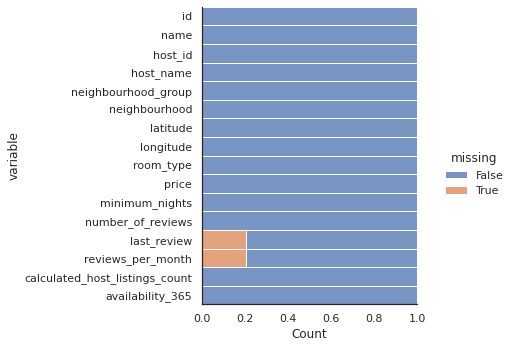

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(10,6))
sb.displot(data=abdf.isna().melt(value_name="missing"), y="variable", hue="missing", multiple="fill", aspect=1.25);

### What did you know about your dataset?

From the dataset, we observe that there are 16 columns and 48895 rows. 
The dataset has both categorical and numerical columns. 

The categorical columns are: 
*   Name - Name of listing/Accommodation
*   Host_name - registered name of hosts
*   Neighbourhood_group - group of neighorhoods/area where listing is located
*   Neighbourhood - area/location where listing is located
*   room_type - type of the rooms for renting
*   last_review - last review of a listing

The numerical columns are: 
*   Id - unique id given to each Listings	
*   Host_id - unique ids of hosts 
*   Latitude & Longitude - geographical location of the listing
*   Price - price/rent of the rooms
*   minimum_nights - minimum nights stay per visit
*   number_of_reviews - total count of reviews per listing
*   reviews_per_month - count of reviews per month
*   availability_365 - number of days the listing is available in a year
*   calculated_host_listings_count  - number of listings per host



## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
abdf.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
# Dataset Describe
abdf.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Variables Description 

From above description, we can undetstand that there are 6 variable columns which are last 6 columns.

Starting with price column, we see that minimum price is 0, which is practically not right as no listing will provide for fee. So, we need to check the rows with 0 price values and we can replace it with, say average value.

Moving to minimum_nights column, we see that minimum nights customers stayed is 1 and max is 1250. 

maximum number_of_reviews is 629, max reviews_per_month is 58 to 59, max listings are 327 and availability ranges from 0 to 365 days.

We can see that 25% of the listings have 0 availability, we shows they are busiest listings


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print(f"List of unique neighbourhood_groups: \ncount-{abdf.neighbourhood_group.nunique()}\n{abdf.neighbourhood_group.unique()}")
print(f"\nList of unique room types: \ncount-{abdf.room_type.nunique()}\n{abdf.room_type.unique()}")
print(f"\nList of unique neighbourhoods: \ncount-{abdf.neighbourhood.nunique()} \n{abdf.neighbourhood.unique()}")

List of unique neighbourhood_groups: 
count-5
['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']

List of unique room types: 
count-3
['Private room' 'Entire home/apt' 'Shared room']

List of unique neighbourhoods: 
count-221 
['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown' 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene'
 'Chelsea' 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood'
 'East Village' 'Greenpoint' 'Bushwick' 'Flatbush' 'Lower East Side'
 'Prospect-Lefferts Gardens' 'Long Island City' 'Kips Bay' 'SoHo'
 'Upper East Side' 'Prospect Heights' 'Washington Heights' 'Woodside'
 'Brooklyn Heights' 'Carroll Gardens' 'Gowanus' 'Flatlands' 'Cobble Hill'
 'Flushing' 'Boerum Hill' 'Sunnyside' 'DUMBO' 'St. George' 'Highbridge'
 'Financial District' 'Ridgewood' 'Morningside Heights' 'Jamaica'
 'Middle Village' 'NoHo' 'Ditmars Steinway' 'Flatiron District'
 'Roosevelt Is

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
abdf.drop(['name'], axis=1, inplace=True)

#replacing all pandas NaN values in 'host_name column with string NA
abdf.fillna({'host_name':'NA'}, inplace=True)

#replacing all NaN values in 'reviews_per_month' & 'last_review' with 0
abdf.fillna({'reviews_per_month':0, 'last_review':0}, inplace=True)


#replacing the '0' values in 'price' column with the average of the price with respect to room types of respective neighbourhood
#function to replace the 0 vlues
def replace(x):
   mask = x == 0
   x.loc[mask] = x[~mask].mean()
   return x

#get the rows to replace 0 by grouping neighbourhood and room_type
check_price_0_rows = abdf.groupby(['neighbourhood', 'room_type'])
replace0_withAvgPrice = check_price_0_rows.transform(replace)
#with eval function replace all the values of ab_df['price'] with the values of temporary dataset - replace0_withAvgPrice['price']
abdf.eval('price = @replace0_withAvgPrice.price', inplace=True)

#Verify if the replace is done correctly by comparing the price column values in both the dataset
count = 0
for i in range(48895):
  if abdf['price'][i] != replace0_withAvgPrice['price'][i]:
    count +=1
count

# reference : https://stackoverflow.com/questions/44432514/pandas-replace-column-with-mean-for-values

<ipython-input-73-297a0937c516>:20: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  replace0_withAvgPrice = check_price_0_rows.transform(replace)
<ipython-input-73-297a0937c516>:20: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  replace0_withAvgPrice = check_price_0_rows.transform(replace)


0

In [ ]:
abdf.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.742061,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.146616,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### What all manipulations have you done and insights you found?

The changes made are:

There are 4 columns with Nan values: name, host_name, last_review and reviews_per_month.

Among these columns, 'name' column seems insignificant in this exploration as 'Id' column can be used inplace of it. Hence, dropping the 'name' column will not affect our analysis.

The Nan values are replaced with 0's in columns last_review and reviews_per_month.

As the null values in host_name column are pandas null values, we can convert them to string so that we dont need to drop the column and use the column if necessory in our analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

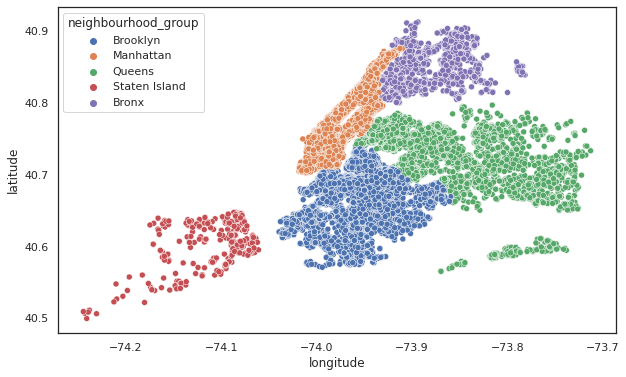

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(10,6))
sb.scatterplot(x = 'longitude', y = 'latitude', hue = 'neighbourhood_group', data = abdf);

##### 1. Why did you pick the specific chart?

The scatter plot will show the listings in the graph which resembles to geographical map making it easier to understand the distribution of the listings across Nyc.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that the manhattan is densely populated with listings, followed by brooklyn. And the Staten island has least listings.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The information of most listed and least listed neighbourhood group will help in uderstanding which area is generating good business and in which area improvement is required. We can see that Staten island has minimum listings. We can understand more about this neighbourhood group and take effective measues towards improving the business. 

#### Chart - 2

neighbourhood_group
Staten Island      373
Bronx             1091
Queens            5666
Brooklyn         20104
Manhattan        21661
Name: id, dtype: int64


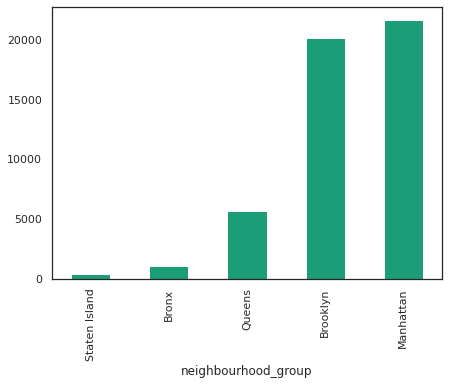

In [ ]:
# Chart - 2 visualization code

#listings count in each neighbourhood group
listing_in_nhood_grp = abdf.groupby(['neighbourhood_group'])['id'].count().sort_values()
print(listing_in_nhood_grp)
listing_in_nhood_grp.plot(kind='bar', colormap='Dark2');

##### 1. Why did you pick the specific chart?

The bar chart is good to see the counts variation. The count of listings in each neighbourhood group can be understood from the bar chart.

##### 2. What is/are the insight(s) found from the chart?

The chart shows the maximum listings of more than 21000+ are registered in Manhattan, followed by Brooklyn (count 20000+) and Queens.
And the least listings are in Staten island.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This will help in understand the distribution of listings in different neighbourhood groups. So, we can understand the most business generating areas based on listing counts.

#### Chart - 3

     host_id  count          hostnames
0  219517861    327       Sonder (NYC)
1  107434423    232         Blueground
2   30283594    121               Kara
3  137358866    103             Kazuya
4   16098958     96     Jeremy & Laura
5   12243051     96             Sonder
6   61391963     91  Corporate Housing
7   22541573     87                Ken
8  200380610     65            Pranjal
9    7503643     52               Vida 



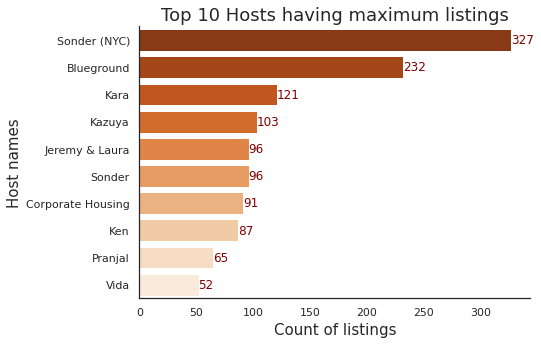

In [ ]:
# Chart - 3 visualization code

#Hosts with most listings in Airbnb (NYC)
top10_hosts = abdf.host_id.value_counts().reset_index().sort_values(by = 'host_id', ascending = False).rename(columns = {'index':'host_id', 'host_id':'count'}).head(10)
top10_hosts
abdf_dict = dict(zip(abdf.host_id, abdf.host_name))
hostnames = []
for x in top10_hosts['host_id']:
  hostnames.append(abdf_dict[x])
top10_hosts['hostnames'] = pd.DataFrame(hostnames)
print(top10_hosts, '\n')

#setting figure size for visualizations
sb.set(rc={'figure.figsize':(7,5)})
sb.set_style('white')

#visual of the top 10 host ids having listings in airbnb
top10_hosts_plot = sb.barplot(x="count", y='hostnames', data=top10_hosts, palette='Oranges_r')
top10_hosts_plot.set_title('Top 10 Hosts having maximum listings', fontsize=18)
top10_hosts_plot.set_xlabel('Count of listings', fontsize=15)
top10_hosts_plot.set_ylabel('Host names', fontsize=15)
top10_hosts_plot.bar_label(top10_hosts_plot.containers[0], color='maroon');
sb.despine(top=True, right=True)


##### 2. What is/are the insight(s) found from the chart?

Answer - we can see from the chart that Sonder(NYC), Bluegaurd, Kara are the top hosts having maximum locations listed in the Airbnb NYC.

#### Chart - 4

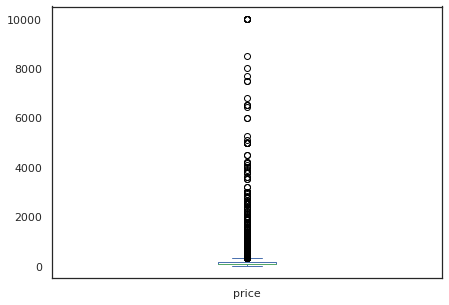

In [ ]:
# Chart - 4 visualization code

#boxplot to see price distribution
abdf.plot(y = 'price', kind = 'box');

##### 1. Why did you pick the specific chart?

Answer: The boxplot will give the detailed variations in price and the mean of the price column. We can also understand the outliers in this chart.

##### 2. What is/are the insight(s) found from the chart?

Answer: From the above boxplot, it is clear than there are lot of outliers in the price column. We can see that the box is very narrow and near to 0. And there are few bubbles near to 10000 values.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer: It will help in understanding how the prices varies across the listings

#### Chart - 5

         room_type  number_of_listings
0  Entire home/apt               25409
1     Private room               22326
2      Shared room                1160



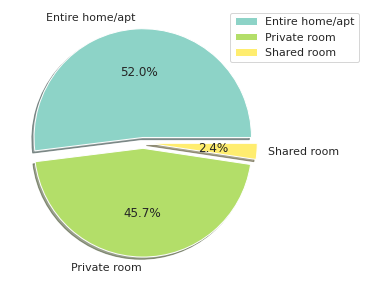

In [ ]:
# Chart - 5 visualization code

# count of  listings for each room types
roomtype = abdf.loc[:, ['room_type', 'id']].groupby('room_type').id.count().reset_index().rename(columns = {'id':'number_of_listings'})
print(f"{roomtype}\n")

idx = 'Entire home/apt', 'Private room', 'Shared room'
roomtype.plot.pie(y='number_of_listings', figsize=(5, 5), labels = idx, autopct='%1.1f%%', ylabel='', explode=[0.05, 0.05, 0.05], shadow=True, colormap = 'Set3');
plt.legend(bbox_to_anchor=(.8, 1), loc='upper left');

##### 1. Why did you pick the specific chart?

Answer: This chart shows count and percentage , It is clearer to see the count as well as percentage in a single chart.

##### 2. What is/are the insight(s) found from the chart?

From the chart we can say that most listinga are of Entire home/apt followed by private rooms. Shared rooms have the least listed in airbnb.

#### Chart - 6

   neighbourhood_group        room_type     id
0                Bronx  Entire home/apt    379
1                Bronx     Private room    652
2                Bronx      Shared room     60
3             Brooklyn  Entire home/apt   9559
4             Brooklyn     Private room  10132
5             Brooklyn      Shared room    413
6            Manhattan  Entire home/apt  13199
7            Manhattan     Private room   7982
8            Manhattan      Shared room    480
9               Queens  Entire home/apt   2096
10              Queens     Private room   3372
11              Queens      Shared room    198
12       Staten Island  Entire home/apt    176
13       Staten Island     Private room    188
14       Staten Island      Shared room      9


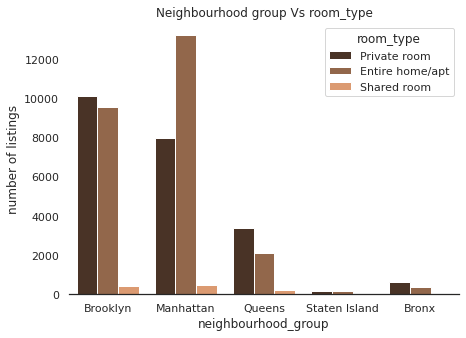

In [ ]:
# Chart - 6 visualization code

#comparing listings between room types in each neighbourhood group
nhood_roomtype = abdf.loc[:,['neighbourhood_group', 'room_type', 'id']].groupby(['neighbourhood_group', 'room_type']).id.count().reset_index()
print(nhood_roomtype)
nhood_roomtype_plot = sb.countplot(x= 'neighbourhood_group', hue = 'room_type', data= abdf, palette = 'copper')
nhood_roomtype_plot.set(title = 'Neighbourhood group Vs room_type')
nhood_roomtype_plot.set(ylabel = 'number of listings')
sb.despine(top=True, right=True, left=True)

##### 2. What is/are the insight(s) found from the chart?

From chart we can see that Manhattan has the maximum listing of room type Entire home/apt. And the shared rooms are least listed in Staten island.

#### Chart - 7

   neighbourhood_group        room_type  average_price
0                Bronx  Entire home/apt     127.506596
1                Bronx     Private room      66.908487
2                Bronx      Shared room      59.800000
3             Brooklyn  Entire home/apt     178.349116
4             Brooklyn     Private room      76.544026
5             Brooklyn      Shared room      50.714359
6            Manhattan  Entire home/apt     249.257175
7            Manhattan     Private room     116.776622
8            Manhattan      Shared room      88.977083
9               Queens  Entire home/apt     147.050573
10              Queens     Private room      71.762456
11              Queens      Shared room      69.020202
12       Staten Island  Entire home/apt     173.846591
13       Staten Island     Private room      62.292553
14       Staten Island      Shared room      57.444444


<ipython-input-81-11f4c3c60981>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sb.barplot(x='neighbourhood_group', y='average_price', hue='room_type', data=x_avgprice, ci = None);


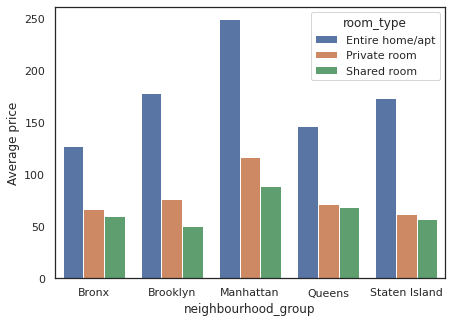

In [ ]:
# Chart - 7 visualization code

# averagre price distribution for each room type in each neighbourhood group
x_avgprice = abdf.loc[:, ['neighbourhood_group', 'room_type', 'price']].groupby(['neighbourhood_group', 'room_type']).agg({'price':'mean'}).reset_index().rename(columns = {'price':'average_price'})
print(x_avgprice);
sb.barplot(x='neighbourhood_group', y='average_price', hue='room_type', data=x_avgprice, ci = None);
plt.ylabel('Average price');

##### 1. Why did you pick the specific chart?

Answer: bar chart is perfect for bivariate comparison. We can understand the average price of room type as well as neighbourhood group in single chart.

##### 2. What is/are the insight(s) found from the chart?

Answer: The most expensive neighbourhood is Manhattan (Entire home/apt),  followed by Brooklyn(Entire home/apt).

#### Chart - 8

   neighbourhood_group        room_type  maximum_price  minimum_price
0                Bronx  Entire home/apt         1000.0           28.0
1                Bronx     Private room         2500.0           10.0
2                Bronx      Shared room          800.0           20.0
3             Brooklyn  Entire home/apt        10000.0           10.0
4             Brooklyn     Private room         7500.0           10.0
5             Brooklyn      Shared room          725.0           15.0
6            Manhattan  Entire home/apt        10000.0           10.0
7            Manhattan     Private room         9999.0           10.0
8            Manhattan      Shared room         1000.0           10.0
9               Queens  Entire home/apt         2600.0           10.0
10              Queens     Private room        10000.0           10.0
11              Queens      Shared room         1800.0           11.0
12       Staten Island  Entire home/apt         5000.0           48.0
13       Staten Isla

<ipython-input-82-c6044504a51b>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sb.barplot(x = 'neighbourhood_group', y = 'maximum_price', hue = 'room_type', data = highest_n_lowest_rent, ci = None, ax = ax[0]);
<ipython-input-82-c6044504a51b>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sb.barplot(x = 'neighbourhood_group', y = 'minimum_price', hue = 'room_type', data = highest_n_lowest_rent, ci = None, ax=ax[1]);


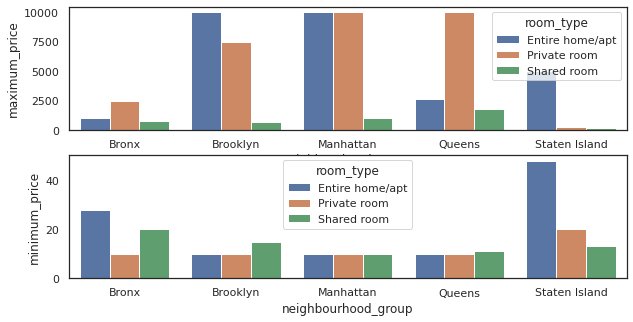

In [ ]:
# Chart - 8 visualization code
lowest_rent = abdf.groupby(['neighbourhood_group','room_type'])['price'].min().reset_index()
lowest_rent.rename(columns = {'price':'minimum_price'}, inplace = True)

highest_n_lowest_rent = abdf.groupby(['neighbourhood_group','room_type'])['price'].max().reset_index()
highest_n_lowest_rent.rename(columns = {'price':'maximum_price'}, inplace = True)

highest_n_lowest_rent['minimum_price'] = lowest_rent['minimum_price']
print(highest_n_lowest_rent,'\n');

f, ax = plt.subplots(2, 1, figsize = (10,5))

sb.barplot(x = 'neighbourhood_group', y = 'maximum_price', hue = 'room_type', data = highest_n_lowest_rent, ci = None, ax = ax[0]);
sb.barplot(x = 'neighbourhood_group', y = 'minimum_price', hue = 'room_type', data = highest_n_lowest_rent, ci = None, ax=ax[1]);

##### 2. What is/are the insight(s) found from the chart?

Answer: The Entire home/apt in manhattan and Brooklyn, and private rooms in Queens have highest price. The minimum price of Entire home/apt is higher in Staten island compared to other neighbourhood groups. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer: Even though the number of listings for Entire home/apt are least (176) in Staten Island the minimum price ($48) is the highest compared to other neighbourhood groups. This can lead to negative growth in this specific area.

#### Chart - 9

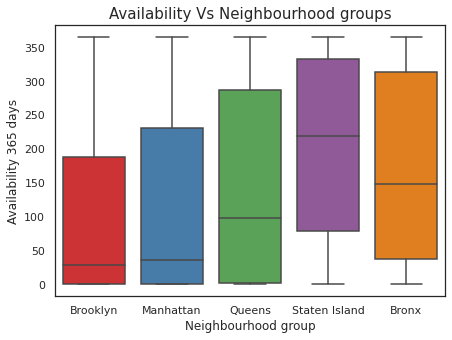

In [ ]:
# Chart - 9 visualization code

#The neighbourhood groups and their relation with availability  
ax = sb.boxplot(x = 'neighbourhood_group', y = 'availability_365', data = abdf, palette = 'Set1');
plt.title('Availability Vs Neighbourhood groups', fontsize = 15);
plt.xlabel('Neighbourhood group');
plt.ylabel('Availability 365 days');

##### 1. Why did you pick the specific chart?

Answer: The boxplot show the max (top of the box) and min (bottom line of the box) values for each variables and also shows the average value (middle line inside the box). This chart best suits for comparing neighbourhood groups with availability.

##### 2. What is/are the insight(s) found from the chart?

Answer: We can see that the Statend island is the most available neighbourhood group with average 200+ days availability compared to others.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer: From the cart we can say that Staten island and bronx are available most of the days in a year. Improving the bookings in these areas can lead to positive business

#### Chart - 10

    neighbourhood       count
0  Fort Wadsworth  365.000000
1      Co-op City  364.000000
2     Willowbrook  351.000000
3     Eastchester  333.461538
4    Richmondtown  300.000000
5      Mill Basin  290.000000
6        Edgemere  275.272727
7   Randall Manor  275.210526
8   West Brighton  274.722222
9  Spuyten Duyvil  270.000000 

                 neighbourhood      count
0             New Springville  65.250000
1             Stuyvesant Town  65.108108
2                 Cobble Hill  63.212121
3                   Rossville  59.000000
4                   Navy Yard  48.928571
5         Morningside Heights  43.054913
6           Downtown Brooklyn  39.481928
7  Bay Terrace, Staten Island   0.000000
8                    New Dorp   0.000000
9                     Woodrow   0.000000 




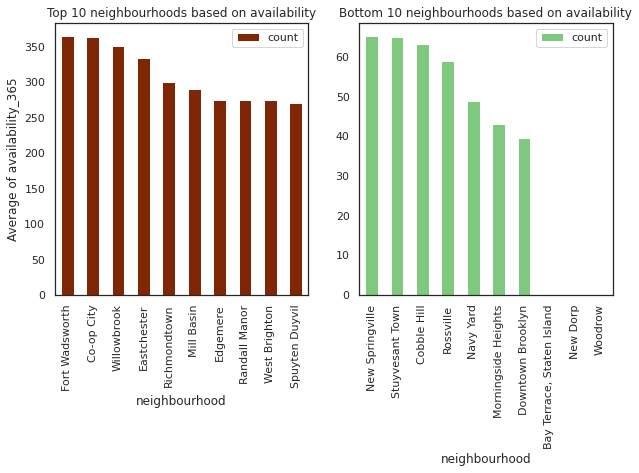

In [ ]:
# Chart - 10 visualization code

# The most and least neighbourhoods with respect to availability
nhood_availability = abdf.loc[:,['neighbourhood_group', 'neighbourhood', 'availability_365']].groupby('neighbourhood').availability_365.mean().sort_values(ascending = False).rename('count')

nhood_availability_high10 = nhood_availability.head(10).reset_index()
nhood_availability_low10 = nhood_availability.tail(10).reset_index()
print(nhood_availability_high10,'\n\n', nhood_availability_low10,'\n\n')

f, (axs0, axs1)= plt.subplots(1, 2, figsize = (10,5)) 

nhood_availability_high10.plot(x = 'neighbourhood', kind = 'bar', ax = axs0, colormap = 'Oranges_r');
axs0.set_title('Top 10 neighbourhoods based on availability')
axs0.set_ylabel('Average of availability_365')

nhood_availability_low10.plot(x = 'neighbourhood', kind='bar', ax=axs1, colormap = 'Accent');
axs1.set_title('Bottom 10 neighbourhoods based on availability');

##### 2. What is/are the insight(s) found from the chart?

Answer:  Fort Wadsworth, Co-op City and Willowbrook are the neighbourhoods which are mostly available (more that 300 days) throughout the year. And the Bay terrace, New dorp, Woodrow are the least available neighbourhoods. 

#### Chart - 11

         room_type  availability_365
2      Shared room        162.000862
0  Entire home/apt        111.920304
1     Private room        111.203933 



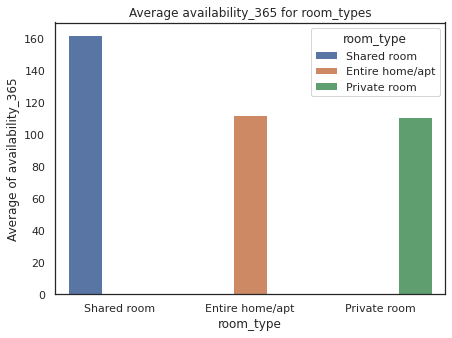

In [ ]:
# Chart - 11 visualization code

# Room types and their relaton with availability
nhood_grp_avg_360avail = abdf.loc[:, ['neighbourhood_group', 'room_type', 'availability_365']].groupby(['room_type']).availability_365.mean()\
.reset_index().sort_values(['availability_365'], ascending = False)
print(nhood_grp_avg_360avail, '\n')
sb.barplot(x = 'room_type',  y = 'availability_365', hue = 'room_type', data = nhood_grp_avg_360avail);
plt.ylabel('Average of availability_365');
plt.title('Average availability_365 for room_types');

##### 2. What is/are the insight(s) found from the chart?

Answer: The shared rooms are mostly available compared to other room types.

#### Chart - 12

    neighbourhood_group       neighbourhood  number_of_reviews
93             Brooklyn        Williamsburg               3920
50             Brooklyn  Bedford-Stuyvesant               3714
105           Manhattan              Harlem               2658
58             Brooklyn            Bushwick               2465
124           Manhattan     Upper West Side               1971
106           Manhattan      Hell's Kitchen               1958
100           Manhattan        East Village               1853
123           Manhattan     Upper East Side               1798
65             Brooklyn       Crown Heights               1564
112           Manhattan             Midtown               1545 




<ipython-input-86-ad20cca16b5a>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sb.barplot(x = 'neighbourhood', y = 'number_of_reviews', data=On_reviews_top10, ci = None, ax = axs1);
<ipython-input-86-ad20cca16b5a>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sb.barplot(x = 'neighbourhood_group', y = 'number_of_reviews', data=On_reviews, ci = None, ax = axs0);


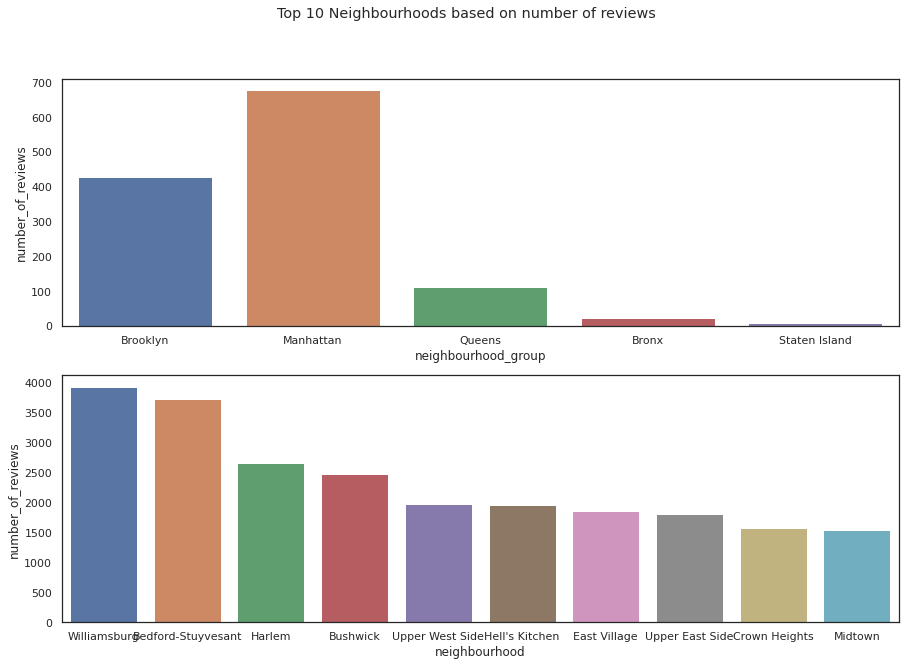

In [ ]:
# Chart - 12 visualization code

#The neighbourhoods and their relation with number of reviews
On_reviews = abdf.loc[:, ['neighbourhood_group', 'neighbourhood', 'number_of_reviews']].groupby(['neighbourhood_group', 'neighbourhood'])\
  .number_of_reviews.count().reset_index().sort_values(['number_of_reviews'], ascending = False)
On_reviews_top10 = On_reviews.head(10)
print(On_reviews_top10, '\n\n');

f, (axs0, axs1)= plt.subplots(2, 1, figsize = (15,10));

sb.barplot(x = 'neighbourhood', y = 'number_of_reviews', data=On_reviews_top10, ci = None, ax = axs1);
sb.barplot(x = 'neighbourhood_group', y = 'number_of_reviews', data=On_reviews, ci = None, ax = axs0);

f.suptitle('Top 10 Neighbourhoods based on number of reviews');

##### 2. What is/are the insight(s) found from the chart?

Answer: we can understand from the chart that the most reviewed neighbourhood group is Manhattan and Brooklyn. If we see the reviews with respect to neighbourhoods, we see that Williumsburg ( Brooklyn neighbourhood group) is the top reviewed.

#### Chart - 13

         room_type  number_of_reviews
0  Entire home/apt              25409
1     Private room              22326
2      Shared room               1160 



<ipython-input-87-38634dec7cea>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sb.barplot(y = 'room_type', x = 'number_of_reviews', data=On_reviews_roomtype, ci = None);


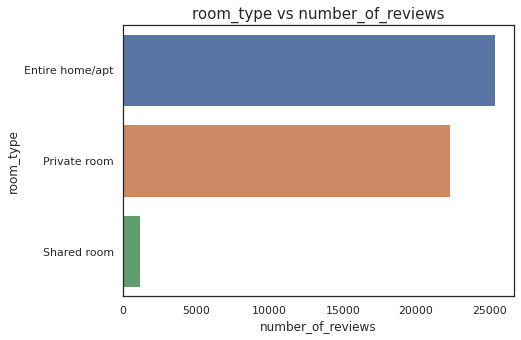

In [ ]:
# Chart - 13 visualization code

#room type with respect to number of reviews
On_reviews_roomtype = abdf.loc[:, ['room_type', 'number_of_reviews']].groupby('room_type').number_of_reviews.count().reset_index().\
sort_values(['number_of_reviews'], ascending = False).head(10)
print(On_reviews_roomtype, '\n')
sb.barplot(y = 'room_type', x = 'number_of_reviews', data=On_reviews_roomtype, ci = None);
plt.title('room_type vs number_of_reviews', fontsize = 15);

##### 2. What is/are the insight(s) found from the chart?

Answer: We can see that Entire home/apt is most reviewed and shared rooms are least reviewed room types.

#### Chart - 14

  host_name  reviews_per_month
0   Row NYC              58.50
1    Louann              20.94
2   Nalicia              19.75
3  Danielle              16.22
4     Brent              15.78
5  Lakshmee              15.32
6      Dona              14.58
7     Alina              14.00
8       Sam              14.00
9    Yvonne              13.48 



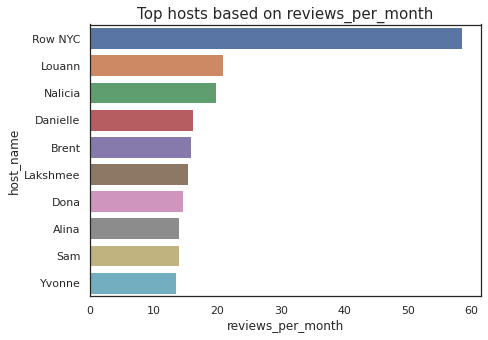

In [ ]:
# Chart - 14 visualization code

#top hosts who had reviewed the listings
host_reviews = abdf.loc[:,['host_name', 'reviews_per_month']].groupby('host_name').max().sort_values(by = 'reviews_per_month', ascending= False).reset_index().head(10)

print(host_reviews, '\n')
sb.barplot(x = 'reviews_per_month', y = 'host_name', data = host_reviews)
plt.title("Top hosts based on reviews_per_month", fontsize = 15);

##### 2. What is/are the insight(s) found from the chart?

Answer: Row(NYC), Louann, Nalicia are the top hosts who reviewed the listings monthly.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer: From the chart, we get the list of host names who reviewed most frequently. Knowing the list of customers who booked and reviewed frequently will help in understanding customer and reading those reviews in detail will help in improving the customer experience

#### Chart - 15

         room_type  avg_min_nights
0      Shared room        6.475000
1     Private room        5.377900
2  Entire home/apt        8.506907 



<ipython-input-89-8a6b102532eb>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sb.barplot(x = 'room_type', y = 'avg_min_nights', data=ddf, ci = None)


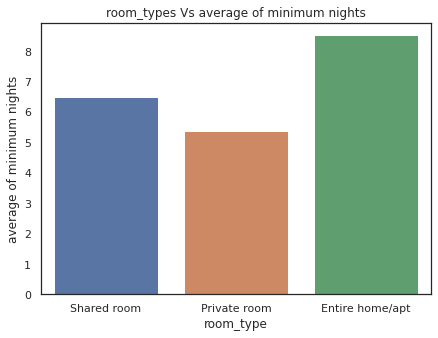

In [ ]:
# Chart - 15 visualization code

# room_type vs minimum nights
abdf[['minimum_nights']].mean()

ddf = abdf.loc[:, ['room_type', 'minimum_nights']].groupby(['room_type']).minimum_nights.mean().reset_index().sort_values(by = ['room_type'], ascending = False).rename(columns = {'minimum_nights':'avg_min_nights'})
ddf.reset_index(inplace = True, drop = True)
print(ddf, '\n')
sb.barplot(x = 'room_type', y = 'avg_min_nights', data=ddf, ci = None)
plt.ylabel('average of minimum nights');
plt.title('room_types Vs average of minimum nights', fontsize = 12);

#### Chart - 16 - Correlation Heatmap

[Text(0.5, 1.0, 'correlation of variables')]

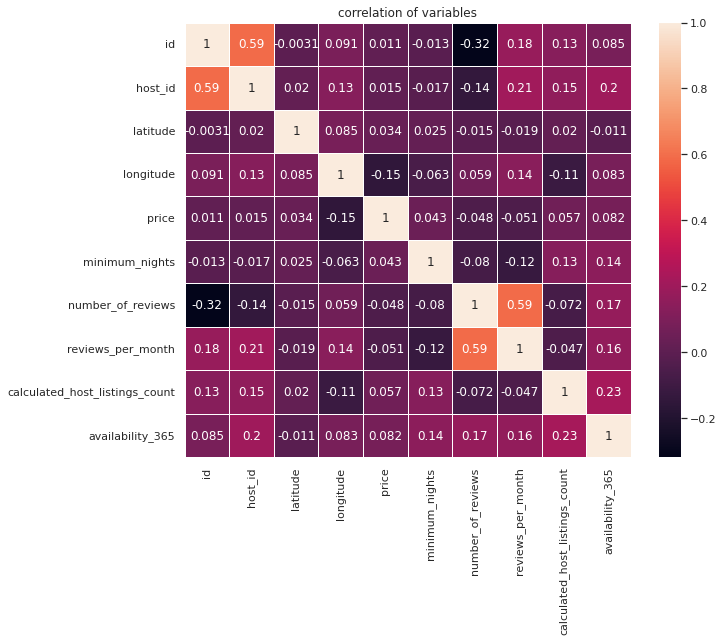

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10,8))
sb.heatmap(abdf.corr(), linewidth =.5, annot = True ).set(title = 'correlation of variables')

##### 2. What is/are the insight(s) found from the chart?

Answer: From the correlation map, we see that id and host_id columns are most related, values of both columns are unique.
And the number of reviews and reviews per month are highly correlated, these two columns meaning is same, related to reviews. So, there is no much corelation found among the dataset.

#### Chart - 17 - Pair Plot 

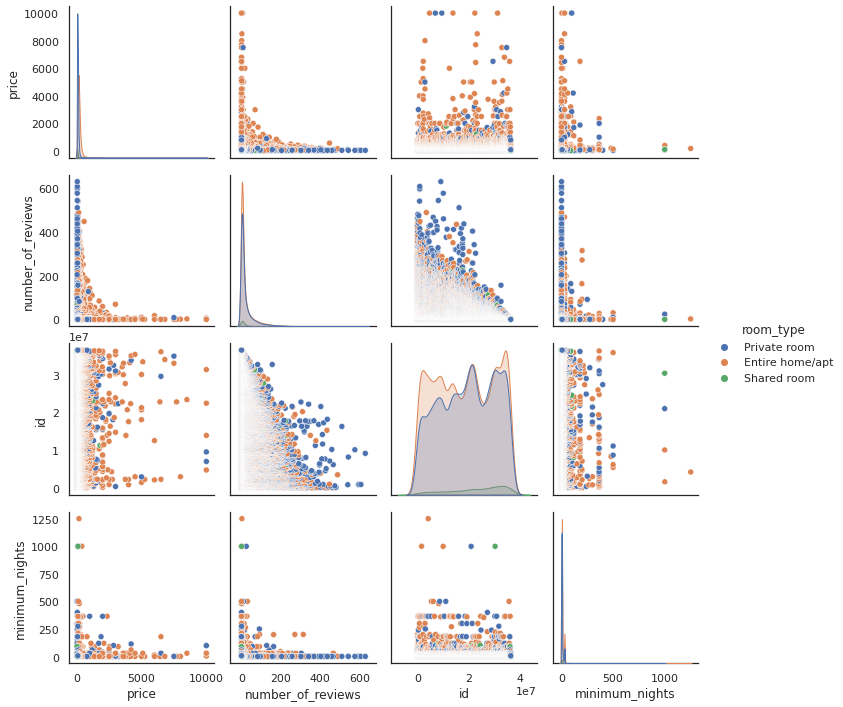

In [ ]:
# Pair Plot visualization code
plot_df = ["neighbourhood_group", "room_type", "price", "number_of_reviews", "id", "minimum_nights"]
sb.pairplot(abdf[plot_df], hue="room_type")


## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here

# **Conclusion**

  From the above analysis, we can conclude that the top host is Sonder(NYC) who has 327 listings. Manhattan is the top neighbourhood group with 52% listings in NYC. ‘Fort Wadsworth’ located in Staten island is the most preferred location based on average best price.

  Entire apartment/Home at Manhattan is the most expensive. Average price for Private room and shared room is also expensive compared to other neighbourhood groups. This indicates that Manhattan is most expensive than other neighbourhood groups.

  Based on reviews, Entire home/apartments had received more reviews compared to other room types. we found that the neighbourhoods: Williamsburg, Bedford –Stuyvesant, Harlem, Bushwick and Upper Westside, have most reviewed listings, which belong to Brooklyn and Manhattan neighbourhood groups. Row NYC is the top host, who received highest monthly reviews. 

  Depending on average minimum nights, we found that private room is preferred for 5-6 days which is least whereas home/apt is preferred for average of 8-9 days per stay. 

  We can understand that most of the guests prefer visiting Manhattan and stay longer despite of higher price compared to other neighbourhood groups.
 



### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***